## Assignment 9

#### 1.复习上课内容。

#### 2.回答以下理论问题。

2.1 简述skip-gram和cbow的区别 ?

skip-gram用中心词作为输入预测context的词；cbow用context的词作为输入预测中心词。

2.2 缺少预料的情况下skip-gram和cbow哪个模型训练效果会更好？ 为什么？

   skip-gram的效果更好，因为可以预测多次。skip-gram当中，每个词都要受到周围词的影响，每个词在作为中心词的时候，都要进行K次的预测、调整。因此，当语料较少，或者词为生僻词出现的次数较少时，这种多次调整会使得词的词向量相对的更加准确。

2.3 negative sampling怎么减少训练的时间复杂度？

1.仅对K个参数进行采样。
2.放弃softmax函数，采用sigmoid函数，这样就不存在先求一遍窗口中所有单词的“得分”的情况了。

2.4 Glove的基本想法是什么？

GloVe 的全称是Global Vectors for Word Representation，是一个基于全局词频统计（count-based & overall staticstics）的词表征（word representation）算法。该算法综合了global matrix factorization（全局矩阵分解） 和 local context window（局部上下文窗口） 两种方法的优点。

glove模型的学习策略就是通过将词对儿的词向量经过内积操作和平移变换去趋于词对儿共现次数的对数值，这是一个回归问题。

从共现矩阵中随机采集一批非零词对作为一个mini-batch的训练数据；随机初始化这些训练数据的词向量以及随机初始化两个偏置；然后进行内积和平移操作并与$ log(x_{ij})$计算损失值，计算梯度值；然后反向传播更新词向量和两个偏置；循环以上过程直到结束条件。


2.5 本节课所学的skip-gram, cbow 和glove 词向量有什么缺点 ？

skip-gram的缺点：时间复杂度为O(KV),训练时间长。

cbow的缺点：结果稀疏性太强，需要使用NCE损失函数。

Glove优点

考虑到词语的上下文、和全局语料库的信息，学习到了语义和语法的信息；
得到的词向量维度小，节省存储和计算资源；
通用性强，可以应用到各种NLP 任务中；

Glove缺点

词和向量是一对一的关系，无法解决多义词的问题；
glove也是一种静态的模型，虽然通用性强，但无法真的特定的任务做动态优化；

#### 3.实践题

在本题，需要你利用gensim库训练文本的词向量并对一些词进行可视化展示所学词向量能反应语意信息。

数据下载地址：https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream.xml.bz2

你需要用维基百科提供的extractor来提取数据：https://github.com/attardi/wikiextractor

你可能需要参考gensim的文档：https://radimrehurek.com/gensim/models/word2vec.html

你可能需要使用t-sne做可视化：https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
import pandas as pd
from io import open
import jieba
from hanziconv import HanziConv
from gensim.corpora import WikiCorpus
from cython.parallel import prange

In [2]:
def get_data_from_wiki(xml_file, save_to_file):
    space = ' '
    i = 0
    l = []
    
    f = open(save_to_file, 'w', encoding='utf-8')
    wiki = WikiCorpus(xml_file,lemmatize=False, dictionary={})#从xml文件中读出训练语料
    
    for text in wiki.get_texts():        
        for i in prange(len(text), nogil=True):
            temp_sentence = text[i]
            simplified_temp_sentence = HanziConv.toSimplified(temp_sentence)
            seg_list = cut(simplified_temp_sentence)  #分词
            for temp_term in seg_list:
                l.append(temp_term)
        f.write(space.join(l) + '\n')
        l = []
        i = i + 1
            
        if(i % 200 == 0):
            print('保存' + str(i) + '文章')
        
    f.close()


In [3]:
def cut(string): return list(jieba.cut(string))

In [4]:
get_data_from_wiki(xml_file = 'zhwiki-20200301-pages-articles-multistream.xml.bz2', save_to_file = 'all_data.txt')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1268: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\2\jieba.cache
Loading model cost 1.254 seconds.
Prefix dict has been built successfully.


保存2200文章
保存400文章
保存200文章
保存400文章
保存6000文章
保存600文章
保存2800文章
保存3400文章
保存600文章
保存400文章
保存200文章
保存1000文章
保存800文章
保存1200文章
保存400文章
保存1400文章
保存200文章
保存400文章
保存600文章
保存1000文章
保存400文章
保存200文章
保存1400文章
保存200文章
保存200文章
保存200文章
保存400文章
保存200文章
保存2800文章
保存200文章
保存200文章
保存200文章
保存600文章
保存800文章
保存200文章
保存600文章
保存1000文章
保存200文章
保存200文章
保存200文章
保存400文章
保存600文章
保存200文章
保存1800文章
保存400文章
保存600文章
保存200文章
保存400文章
保存600文章
保存400文章
保存200文章
保存200文章
保存400文章
保存800文章
保存400文章
保存200文章
保存200文章
保存800文章
保存200文章
保存400文章
保存200文章
保存200文章
保存400文章
保存200文章
保存400文章
保存1000文章
保存400文章
保存400文章
保存200文章
保存200文章
保存200文章
保存800文章
保存200文章
保存200文章
保存400文章
保存200文章
保存400文章
保存400文章
保存400文章
保存400文章
保存200文章
保存200文章
保存200文章
保存400文章
保存200文章
保存200文章
保存200文章
保存200文章
保存600文章
保存1600文章
保存200文章
保存1800文章
保存800文章
保存200文章
保存200文章
保存600文章
保存200文章
保存600文章
保存1200文章
保存200文章
保存200文章
保存800文章
保存200文章
保存200文章
保存200文章
保存400文章
保存800文章
保存600文章
保存200文章
保存200文章
保存200文章
保存200文章
保存800文章
保存200文章
保存200文章
保存400文章
保存200文章
保存2000文章
保存200文章
保存400文章
保存1000文章
保存200文章
保存400文

## Train Word2Vec model

In [6]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [7]:
model = Word2Vec(LineSentence('all_data.txt'),min_count = 5, sg = 0, size = 5,  workers = 4)  #sg=0默认为CBOW，sg=1是skip-gram算法，对低频词敏感

In [8]:
model.save('cbow_word2vec_model')

In [9]:
len(model.wv.vocab)

860484

In [10]:
model.most_similar('后浪',topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('梅威瑟', 0.9986051321029663),
 ('歌唱剧', 0.9982419610023499),
 ('猎头公司', 0.9978682398796082),
 ('麦王', 0.9977439641952515),
 ('史蒂维', 0.9973161220550537),
 ('钟浩贤', 0.9973005652427673),
 ('蜜食记', 0.9968385696411133),
 ('欲动', 0.9966882467269897),
 ('王介安', 0.9965086579322815),
 ('苟乃鹏', 0.996257483959198),
 ('阎雪芊', 0.9962145686149597),
 ('黄宗霑', 0.9958901405334473),
 ('安博莉亚', 0.9955663681030273),
 ('东仑', 0.994878351688385),
 ('海克尔', 0.9942201375961304),
 ('谭奖', 0.9937306046485901),
 ('罗森索', 0.9936395883560181),
 ('漫话', 0.9929612874984741),
 ('李恩美', 0.9926851987838745),
 ('ascaride', 0.9925922751426697)]

In [15]:
model.most_similar('人工智能',topn=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('广告宣传', 0.9991866946220398),
 ('下载量', 0.9988788366317749),
 ('手册', 0.9971504807472229),
 ('登入', 0.9970518350601196),
 ('superband', 0.9963167905807495),
 ('亿次', 0.9956899881362915),
 ('收听', 0.9951545596122742),
 ('新一代', 0.9949077367782593),
 ('美国市场', 0.9948644638061523),
 ('上架', 0.9947669506072998)]

## Visualization

In [22]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [23]:
def tsne_plot(model):
    tokens = []
    labels = []
    i = 0
    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        if i > 500:break
        i += 1
    tsen_model = TSNE(n_components = 2, perplexity=30,init='pca',random_state=20)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                    xy=(x[i],y[i]),
                    xytest=(5,2),
                    textcoords='offset points',
                    ha = 'right',
                    va = 'bottom')
    plt.show

In [25]:
def tsne_plot(model):
    tokens=[]
    labels=[]
    i = 0
    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        if i>500:break
        i += 1

    tsne_model = TSNE(n_components=2,perplexity=30,init='pca',random_state=23)    
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

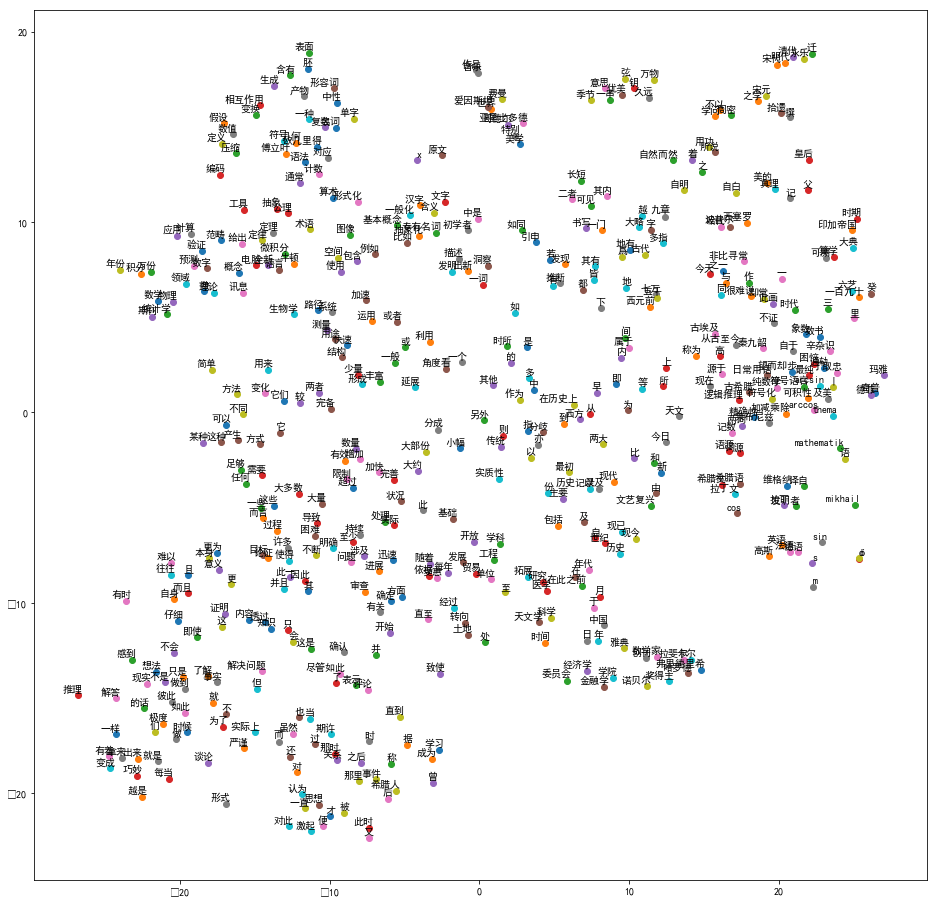

In [26]:
plt.rcParams['font.sans-serif'] = ['SimHei']

tsne_plot(model)

In [ ]:
#wiki_data下载时间较长，语料处理耗时。使用云服务器训练词向量也要大半天。"区块链"not in vocabulary ?